# Advanced Machine Learning - Basic Machine Learning in Python - Fashion MNIST

## Data Prep

### Lots of Imports

To build predictive models in Python we use a set of libraries that are imported here. In particular **pandas** and **sklearn** are particularly important.

In [3]:
import os
import subprocess
from IPython.display import display, HTML, Image
import io
from operator import itemgetter
import random 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from sklearn import metrics
from sklearn import model_selection
from sklearn import ensemble
from sklearn import preprocessing

### Setup

Take only a sample of the dataset for fast testing

In [4]:
data_sampling_rate = 0.1

Setup the number of folds for all grid searches (should be 5 - 10)

In [5]:
cv_folds = 2

Set up a dictionary to store simple model perofrmance comparions

In [6]:
model_test_accuracy_comparisons = dict()
model_valid_accuracy_comparisons = dict()
model_tuned_params_list = dict()

### Load & Partition Data

Load the dataset and explore it.

In [7]:
file_name = '../Data/fashion-mnist_train.csv'
target_feature = "label"
num_classes = 10
classes = {0: "T-shirt/top", 1:"Trouser", 2: "Pullover", 3:"Dress", 4:"Coat", 5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle boot"}

In [8]:
# Add  code here
dataset = pd.read_csv(file_name)
dataset = dataset.sample(frac=data_sampling_rate) #take a sample from the dataset so everyhting runs smoothly
display(dataset.head())

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
49436,1,0,0,0,0,0,0,0,0,0,...,89,0,0,0,0,0,0,0,0,0
29529,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47159,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18183,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21820,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Examine the distribution of the target levels

In [9]:
dataset[target_feature].value_counts()

label
2    636
1    606
5    604
3    604
6    602
4    601
0    590
9    587
8    586
7    584
Name: count, dtype: int64

Display summary statistics for each feature.

In [10]:
if(dataset.select_dtypes(include=[np.number]).shape[1] > 0):
    display(dataset.select_dtypes(include=[np.number]).describe().transpose())
if(dataset.select_dtypes(include=['object']).shape[1] > 0):
    display(dataset.select_dtypes(include=[np.object]).describe().transpose())

,count,mean,std,min,25%,50%,75%,max
label,6000.0,4.464167,2.859967,0.0,2.0,4.0,7.0,9.0
pixel1,6000.0,0.000167,0.012910,0.0,0.0,0.0,0.0,1.0
pixel2,6000.0,0.007000,0.229405,0.0,0.0,0.0,0.0,15.0
pixel3,6000.0,0.060000,1.267149,0.0,0.0,0.0,0.0,56.0
pixel4,6000.0,0.184000,4.047865,0.0,0.0,0.0,0.0,164.0
...,...,...,...,...,...,...,...,...
pixel780,6000.0,18.014167,44.965783,0.0,0.0,0.0,0.0,246.0
pixel781,6000.0,8.604500,29.148042,0.0,0.0,0.0,0.0,226.0
pixel782,6000.0,2.683000,16.736194,0.0,0.0,0.0,0.0,255.0
pixel783,6000.0,0.851333,9.303923,0.0,0.0,0.0,0.0,255.0


Examine presence of missing values

In [11]:
# Check for presence of missing values
print("Missing Values")
print(dataset.isnull().sum().sort_values(ascending = False))

Missing Values
pixel784    0
pixel768    0
pixel767    0
pixel766    0
pixel765    0
           ..
pixel5      0
pixel4      0
pixel3      0
pixel2      0
pixel1      0
Length: 785, dtype: int64


Isolate the descriptive features we are interested in

In [12]:
X = dataset[dataset.columns[1:]]
Y = np.array(dataset[target_feature])

Display some of the instances in thge datset (only really useful for images)

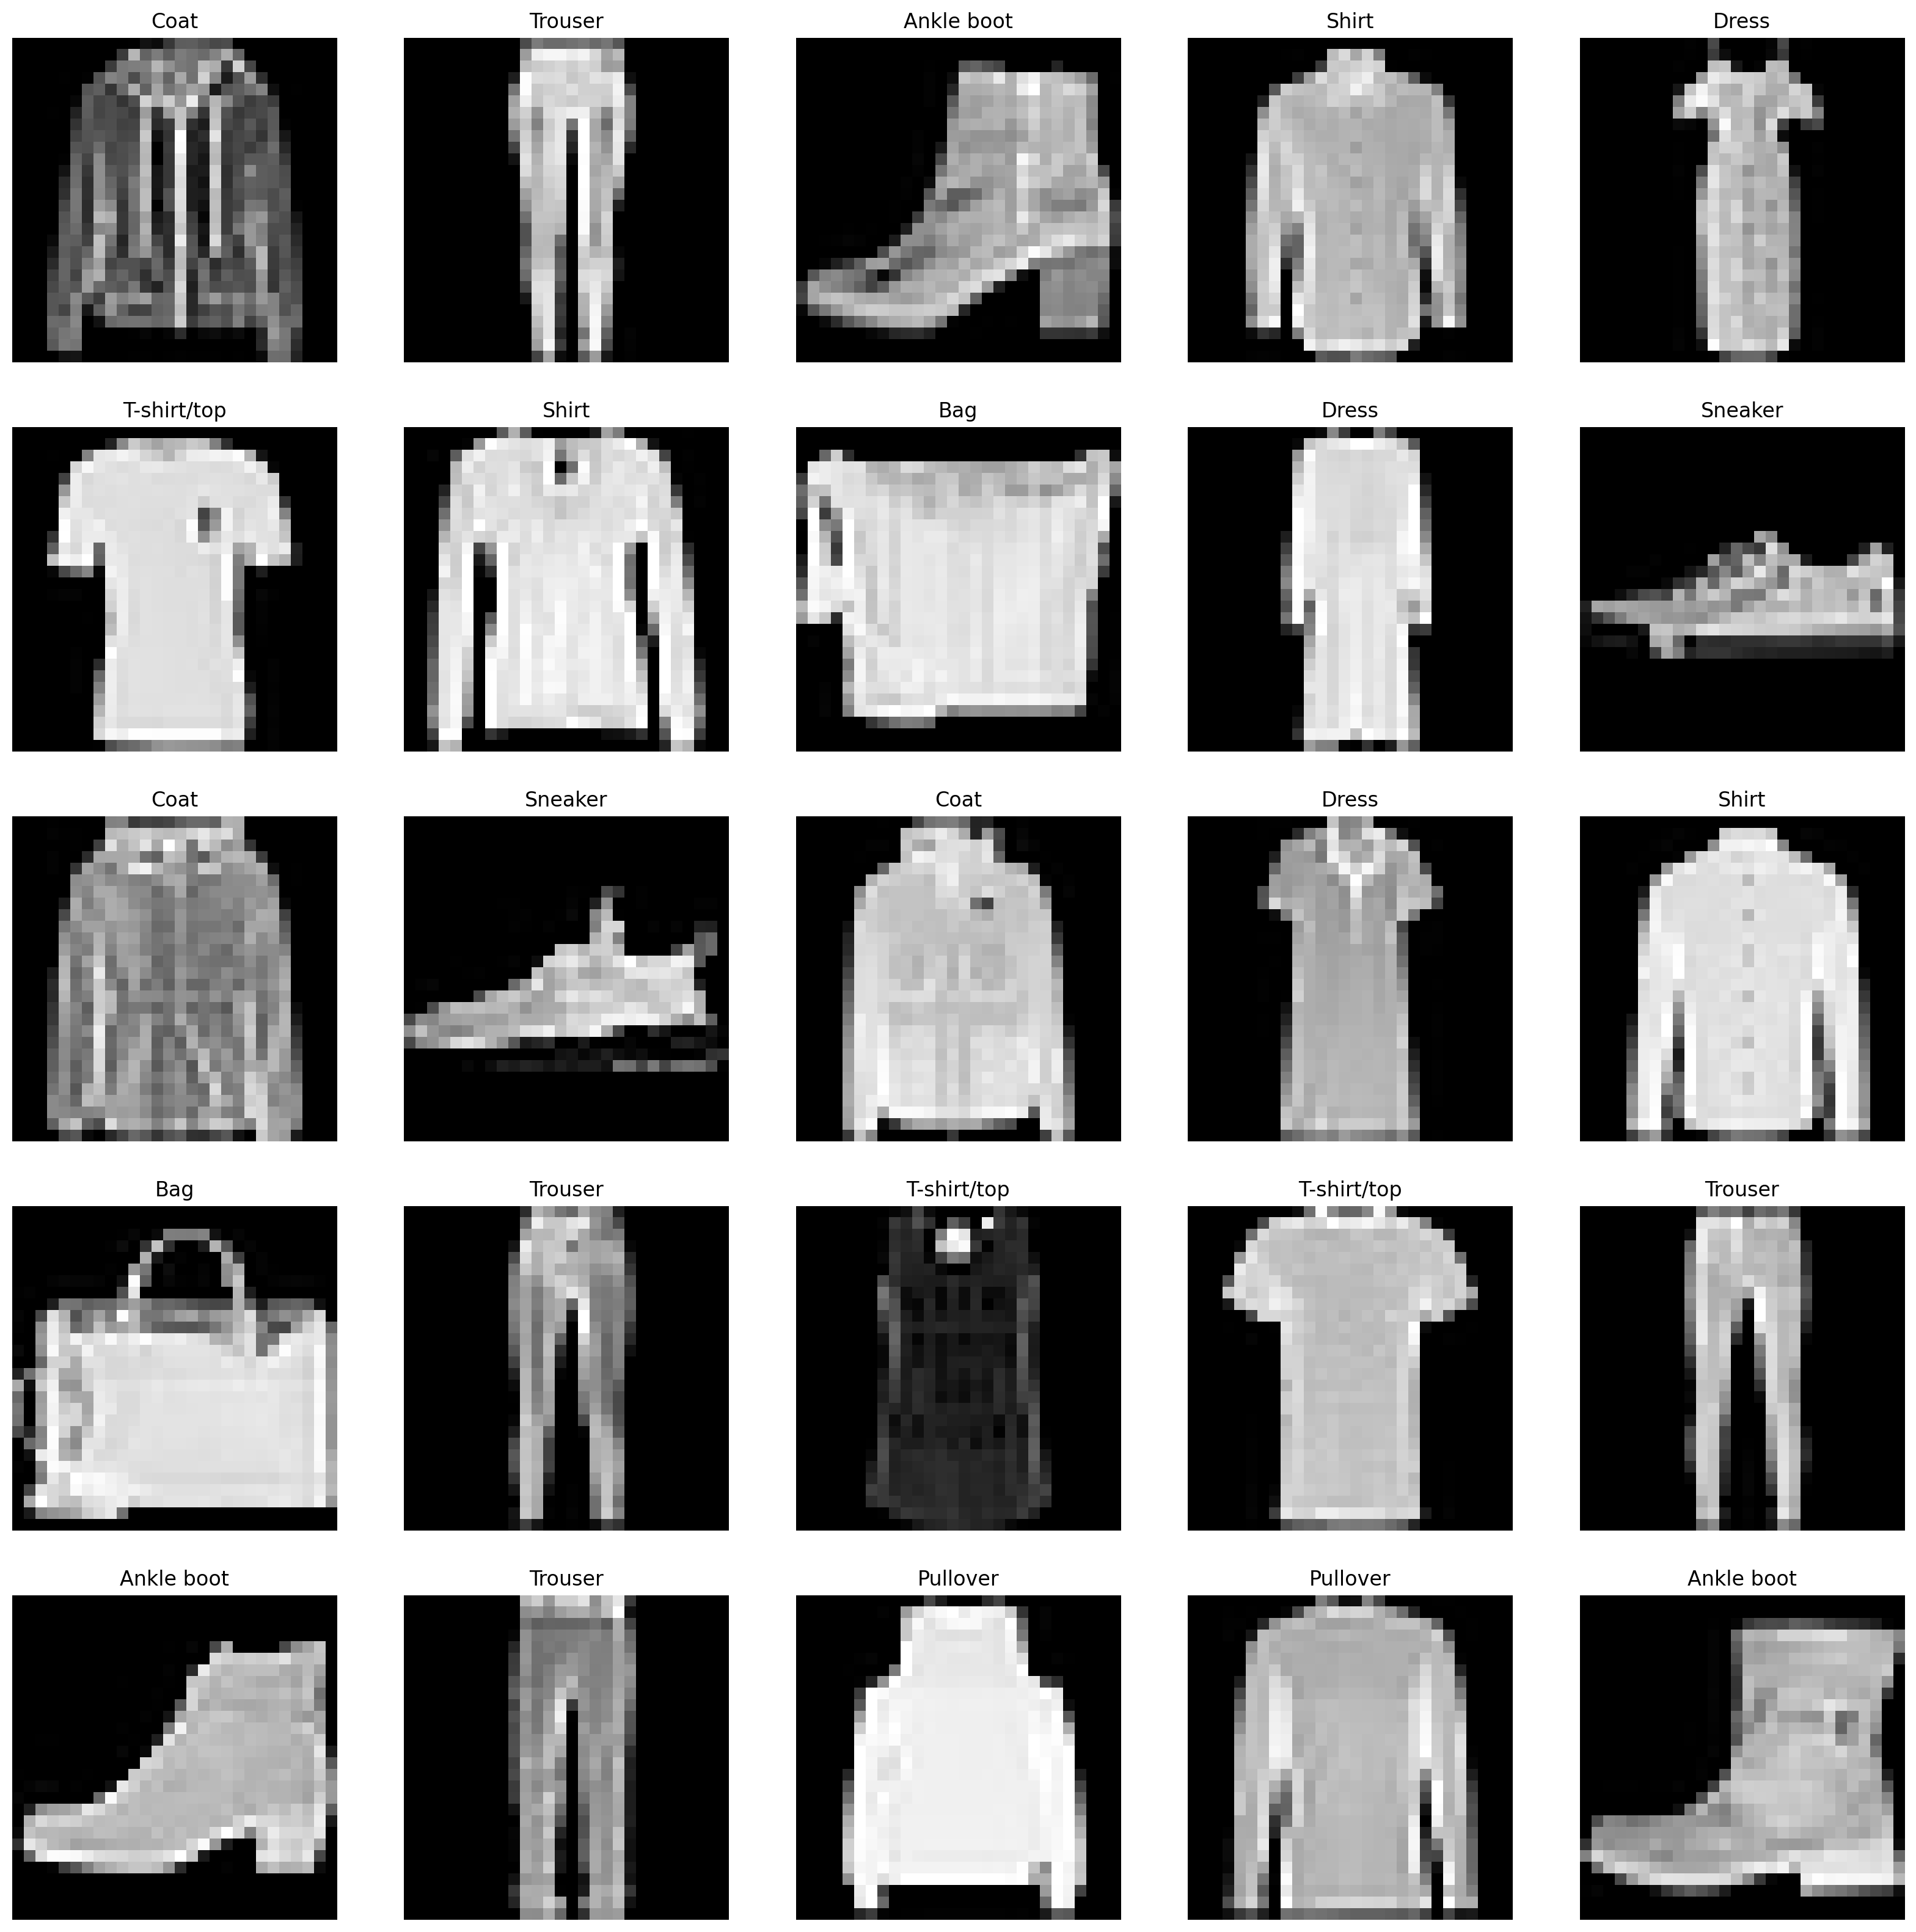

In [13]:
pltsize=4
row_images = 5
col_images = 5
plt.figure(figsize=(col_images*pltsize, row_images*pltsize))

for i in range(row_images * col_images):
    i_rand = random.randint(0, X.shape[0])
    plt.subplot(row_images,col_images,i+1)
    plt.axis('off')
    plt.imshow((X.iloc[i_rand]).values.astype('int').reshape(28,28), cmap='gray', vmin=0, vmax=255)
    plt.title((str(classes[Y[i_rand]])))
    # print('Training sample',i_rand,': class:',y_train[i_rand])

plt.show()

Split the data into a **training set**, a **vaidation set**, and a **test set**

In [16]:
# Add code here

X_train_plus_valid, X_test, y_train_plus_valid, y_test = model_selection.train_test_split(X, Y, 
                        shuffle=True, 
                        stratify = Y, 
                        test_size = 0.2)

X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X_train_plus_valid, y_train_plus_valid, 
                        shuffle=True, 
                        stratify = y_train_plus_valid, 
                        test_size = 0.25)

print("X shape: " + str(X.shape))    
print("X_train shape: " + str(X_train.shape))
print("X_test shape: " + str(X_test.shape))
print("X_val shape: " + str(X_valid.shape))

print("X_train_plus_valid shape" + str(X_train_plus_valid.shape))

X shape: (6000, 784)
X_train shape: (3600, 784)
X_test shape: (1200, 784)
X_val shape: (1200, 784)
X_train_plus_valid shape(4800, 784)


Normalise the data (important for some models)

In [17]:
X_train_plus_valid = (X_train_plus_valid/255*2) - 1
X_train = (X_train/255*2) - 1
X_valid = (X_valid/255*2) - 1
X_test = (X_test/255*2) - 1

In [18]:
display(X_train.shape)
display(X_train.head())
display(X_valid.shape)
display(X_valid.head())
display(X_test.shape)
display(X_test.head())

(3600, 784)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
12897,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,...,-0.231373,-1.000000,-1.000000,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0
56273,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.960784,-1.000000,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0
38779,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.200000,0.513725,0.458824,...,0.482353,0.372549,-0.968627,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0
8825,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-0.537255,...,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0
12234,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.952941,-0.992157,-1.000000,...,-0.262745,-0.027451,-0.458824,-1.0,-0.976471,-1.0,-1.0,-1.0,-1.0,-1.0


(1200, 784)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
49533,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,0.490196,...,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
15109,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.000000,...,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
39226,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.000000,...,0.082353,-1.0,-1.000000,-0.992157,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
20911,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.000000,...,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
54944,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.992157,-0.976471,-1.0,-1.000000,...,-0.984314,-1.0,-0.756863,0.498039,0.584314,0.458824,-1.0,-1.0,-1.0,-1.0


(1200, 784)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
18481,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,...,-0.168627,-0.843137,-0.654902,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0
21054,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,...,-0.976471,-0.968627,-1.000000,-1.000000,-0.537255,-0.058824,-0.686275,-1.0,-1.0,-1.0
3450,-1.0,-1.0,-1.0,-0.976471,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,...,-0.976471,-0.976471,-1.000000,-0.929412,-0.137255,-0.066667,-0.788235,-1.0,-1.0,-1.0
24299,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-0.788235,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0
44761,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0


## Train a Model

#### Random Forests

Train and evaluate a simple model random forest ensemble model.

In [19]:
# Add code here
my_model = ensemble.RandomForestClassifier(n_estimators=300, \
                                           max_features = 3,\
                                           min_samples_split=200)
my_model.fit(X_train,y_train)

RandomForestClassifier(max_features=3, min_samples_split=200, n_estimators=300)

Make and evaluate a set of predictions based on the validation data

In [20]:
# Add code here
y_pred = my_model.predict(X_valid)

In [21]:
accuracy = metrics.accuracy_score(y_valid, y_pred)
model_valid_accuracy_comparisons["Random Forest"] = accuracy
print("Accuracy: " +  str(accuracy))

Accuracy: 0.7858333333333334


              precision    recall  f1-score   support

           0       0.73      0.86      0.79       118
           1       0.96      0.97      0.96       121
           2       0.60      0.81      0.69       127
           3       0.73      0.87      0.80       121
           4       0.68      0.59      0.63       120
           5       0.95      0.76      0.84       121
           6       0.74      0.27      0.39       120
           7       0.78      0.86      0.82       117
           8       0.90      0.96      0.93       117
           9       0.85      0.92      0.89       118

    accuracy                           0.79      1200
   macro avg       0.79      0.79      0.77      1200
weighted avg       0.79      0.79      0.77      1200



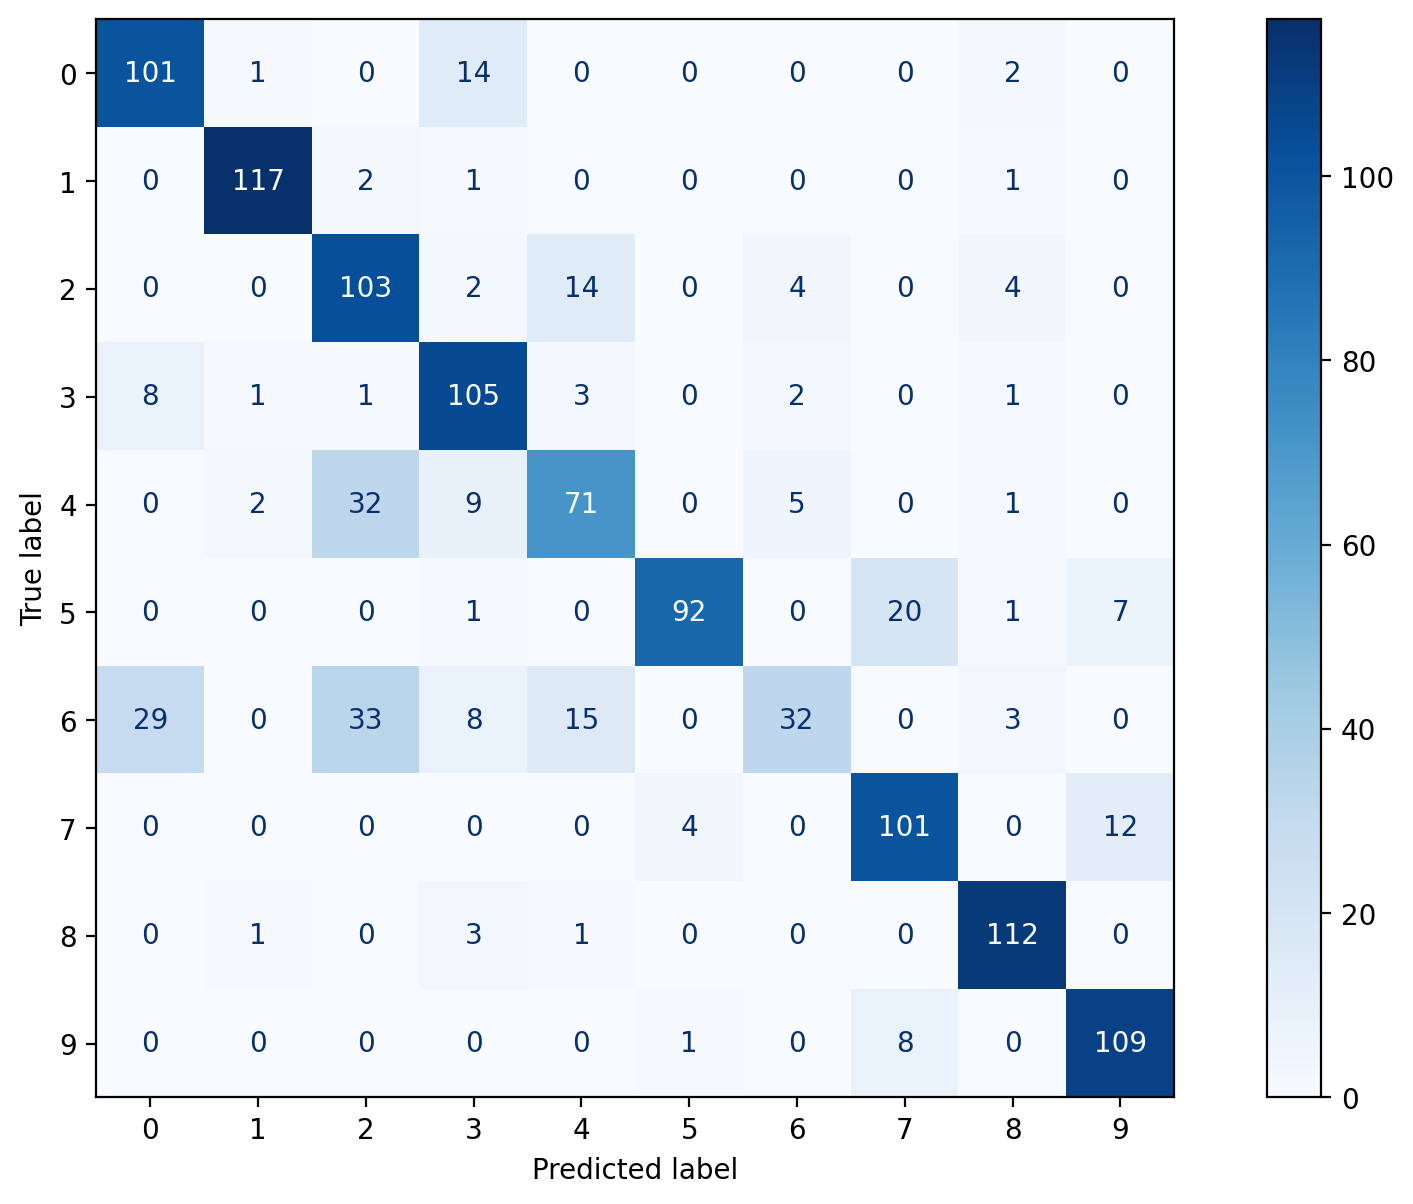

In [22]:
print(metrics.classification_report(y_valid, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_valid, y_pred, cmap = 'Blues')

Choose parameters using a grid search

In [23]:
# Add code here
param_grid = [
 {'n_estimators': list(range(100, 501, 50)), 
  'max_features': list(range(2, 10, 2)), 
  'min_samples_split': [200] }
]

In [24]:
# Perform the search
my_tuned_model = model_selection.GridSearchCV(ensemble.RandomForestClassifier(), param_grid, cv=cv_folds, verbose = 2, n_jobs = -1)
my_tuned_model.fit(X_train_plus_valid, y_train_plus_valid)

# Print details
print("Best parameters set found on development set:")
print(my_tuned_model.best_params_)
model_tuned_params_list["Tuned Random Forest"] = my_tuned_model.best_params_
print(my_tuned_model.best_score_)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[CV] END max_features=2, min_samples_split=200, n_estimators=100; total time=   0.5s


[CV] END max_features=2, min_samples_split=200, n_estimators=100; total time=   0.3s


[CV] END max_features=2, min_samples_split=200, n_estimators=150; total time=   0.4s


[CV] END max_features=2, min_samples_split=200, n_estimators=150; total time=   0.4s


[CV] END max_features=2, min_samples_split=200, n_estimators=200; total time=   0.5s


[CV] END max_features=2, min_samples_split=200, n_estimators=200; total time=   0.4s


[CV] END max_features=2, min_samples_split=200, n_estimators=250; total time=   0.6s


[CV] END max_features=2, min_samples_split=200, n_estimators=250; total time=   0.5s


[CV] END max_features=2, min_samples_split=200, n_estimators=300; total time=   0.8s


[CV] END max_features=2, min_samples_split=200, n_estimators=300; total time=   0.6s


[CV] END max_features=2, min_samples_split=200, n_estimators=350; total time=   0.8s


[CV] END max_features=2, min_samples_split=200, n_estimators=350; total time=   0.8s


[CV] END max_features=2, min_samples_split=200, n_estimators=400; total time=   1.0s


[CV] END max_features=2, min_samples_split=200, n_estimators=400; total time=   0.9s


[CV] END max_features=2, min_samples_split=200, n_estimators=450; total time=   1.0s


[CV] END max_features=2, min_samples_split=200, n_estimators=450; total time=   1.0s


[CV] END max_features=2, min_samples_split=200, n_estimators=500; total time=   1.0s


[CV] END max_features=2, min_samples_split=200, n_estimators=500; total time=   1.2s


[CV] END max_features=4, min_samples_split=200, n_estimators=100; total time=   0.3s


[CV] END max_features=4, min_samples_split=200, n_estimators=100; total time=   0.4s


[CV] END max_features=4, min_samples_split=200, n_estimators=150; total time=   0.5s


[CV] END max_features=4, min_samples_split=200, n_estimators=150; total time=   0.4s


[CV] END max_features=4, min_samples_split=200, n_estimators=200; total time=   0.6s


[CV] END max_features=4, min_samples_split=200, n_estimators=200; total time=   0.7s


[CV] END max_features=4, min_samples_split=200, n_estimators=250; total time=   0.7s


[CV] END max_features=4, min_samples_split=200, n_estimators=250; total time=   0.8s


[CV] END max_features=4, min_samples_split=200, n_estimators=300; total time=   1.0s


[CV] END max_features=4, min_samples_split=200, n_estimators=300; total time=   0.8s


[CV] END max_features=4, min_samples_split=200, n_estimators=350; total time=   1.1s


[CV] END max_features=4, min_samples_split=200, n_estimators=350; total time=   1.0s


[CV] END max_features=4, min_samples_split=200, n_estimators=400; total time=   1.3s


[CV] END max_features=4, min_samples_split=200, n_estimators=400; total time=   1.1s


[CV] END max_features=4, min_samples_split=200, n_estimators=450; total time=   1.4s


[CV] END max_features=4, min_samples_split=200, n_estimators=450; total time=   1.2s


[CV] END max_features=4, min_samples_split=200, n_estimators=500; total time=   1.7s


[CV] END max_features=4, min_samples_split=200, n_estimators=500; total time=   1.4s


[CV] END max_features=6, min_samples_split=200, n_estimators=100; total time=   0.4s


[CV] END max_features=6, min_samples_split=200, n_estimators=100; total time=   0.3s


[CV] END max_features=6, min_samples_split=200, n_estimators=150; total time=   0.5s


[CV] END max_features=6, min_samples_split=200, n_estimators=150; total time=   0.5s


[CV] END max_features=6, min_samples_split=200, n_estimators=200; total time=   0.7s


[CV] END max_features=6, min_samples_split=200, n_estimators=200; total time=   0.7s


[CV] END max_features=6, min_samples_split=200, n_estimators=250; total time=   1.0s


[CV] END max_features=6, min_samples_split=200, n_estimators=250; total time=   0.8s


[CV] END max_features=6, min_samples_split=200, n_estimators=300; total time=   1.0s


[CV] END max_features=6, min_samples_split=200, n_estimators=300; total time=   1.0s


[CV] END max_features=6, min_samples_split=200, n_estimators=350; total time=   1.3s


[CV] END max_features=6, min_samples_split=200, n_estimators=350; total time=   1.2s


[CV] END max_features=6, min_samples_split=200, n_estimators=400; total time=   1.4s


[CV] END max_features=6, min_samples_split=200, n_estimators=400; total time=   1.5s


[CV] END max_features=6, min_samples_split=200, n_estimators=450; total time=   1.5s


[CV] END max_features=6, min_samples_split=200, n_estimators=450; total time=   1.5s


[CV] END max_features=6, min_samples_split=200, n_estimators=500; total time=   1.8s


[CV] END max_features=6, min_samples_split=200, n_estimators=500; total time=   1.7s


[CV] END max_features=8, min_samples_split=200, n_estimators=100; total time=   0.4s


[CV] END max_features=8, min_samples_split=200, n_estimators=100; total time=   0.4s


[CV] END max_features=8, min_samples_split=200, n_estimators=150; total time=   0.9s


[CV] END max_features=8, min_samples_split=200, n_estimators=150; total time=   0.6s


[CV] END max_features=8, min_samples_split=200, n_estimators=200; total time=   0.8s


[CV] END max_features=8, min_samples_split=200, n_estimators=200; total time=   0.8s


[CV] END max_features=8, min_samples_split=200, n_estimators=250; total time=   1.0s


[CV] END max_features=8, min_samples_split=200, n_estimators=250; total time=   1.0s


[CV] END max_features=8, min_samples_split=200, n_estimators=300; total time=   1.4s


[CV] END max_features=8, min_samples_split=200, n_estimators=300; total time=   1.2s


[CV] END max_features=8, min_samples_split=200, n_estimators=350; total time=   1.4s


[CV] END max_features=8, min_samples_split=200, n_estimators=350; total time=   1.4s


[CV] END max_features=8, min_samples_split=200, n_estimators=400; total time=   1.8s


[CV] END max_features=8, min_samples_split=200, n_estimators=400; total time=   1.6s


[CV] END max_features=8, min_samples_split=200, n_estimators=450; total time=   1.8s


[CV] END max_features=8, min_samples_split=200, n_estimators=450; total time=   1.8s


[CV] END max_features=8, min_samples_split=200, n_estimators=500; total time=   2.2s


[CV] END max_features=8, min_samples_split=200, n_estimators=500; total time=   2.0s


Best parameters set found on development set:
{'max_features': 8, 'min_samples_split': 200, 'n_estimators': 500}
0.7660416666666667


Make and evaluate a set of predictions for the test dataset.

In [25]:
# Add code here

my_model2 = ensemble.RandomForestClassifier(n_estimators=500, \
                                           max_features = 8,\
                                           min_samples_split=200)
my_model2.fit(X_train,y_train)


RandomForestClassifier(max_features=8, min_samples_split=200, n_estimators=500)

In [27]:
# Add code here

y_pred = my_model2.predict(X_valid)

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       118
           1       0.97      0.96      0.97       121
           2       0.64      0.77      0.70       127
           3       0.71      0.87      0.78       121
           4       0.67      0.69      0.68       120
           5       0.94      0.80      0.87       121
           6       0.75      0.28      0.40       120
           7       0.80      0.85      0.82       117
           8       0.89      0.95      0.92       117
           9       0.87      0.94      0.91       118

    accuracy                           0.79      1200
   macro avg       0.80      0.79      0.78      1200
weighted avg       0.80      0.79      0.78      1200



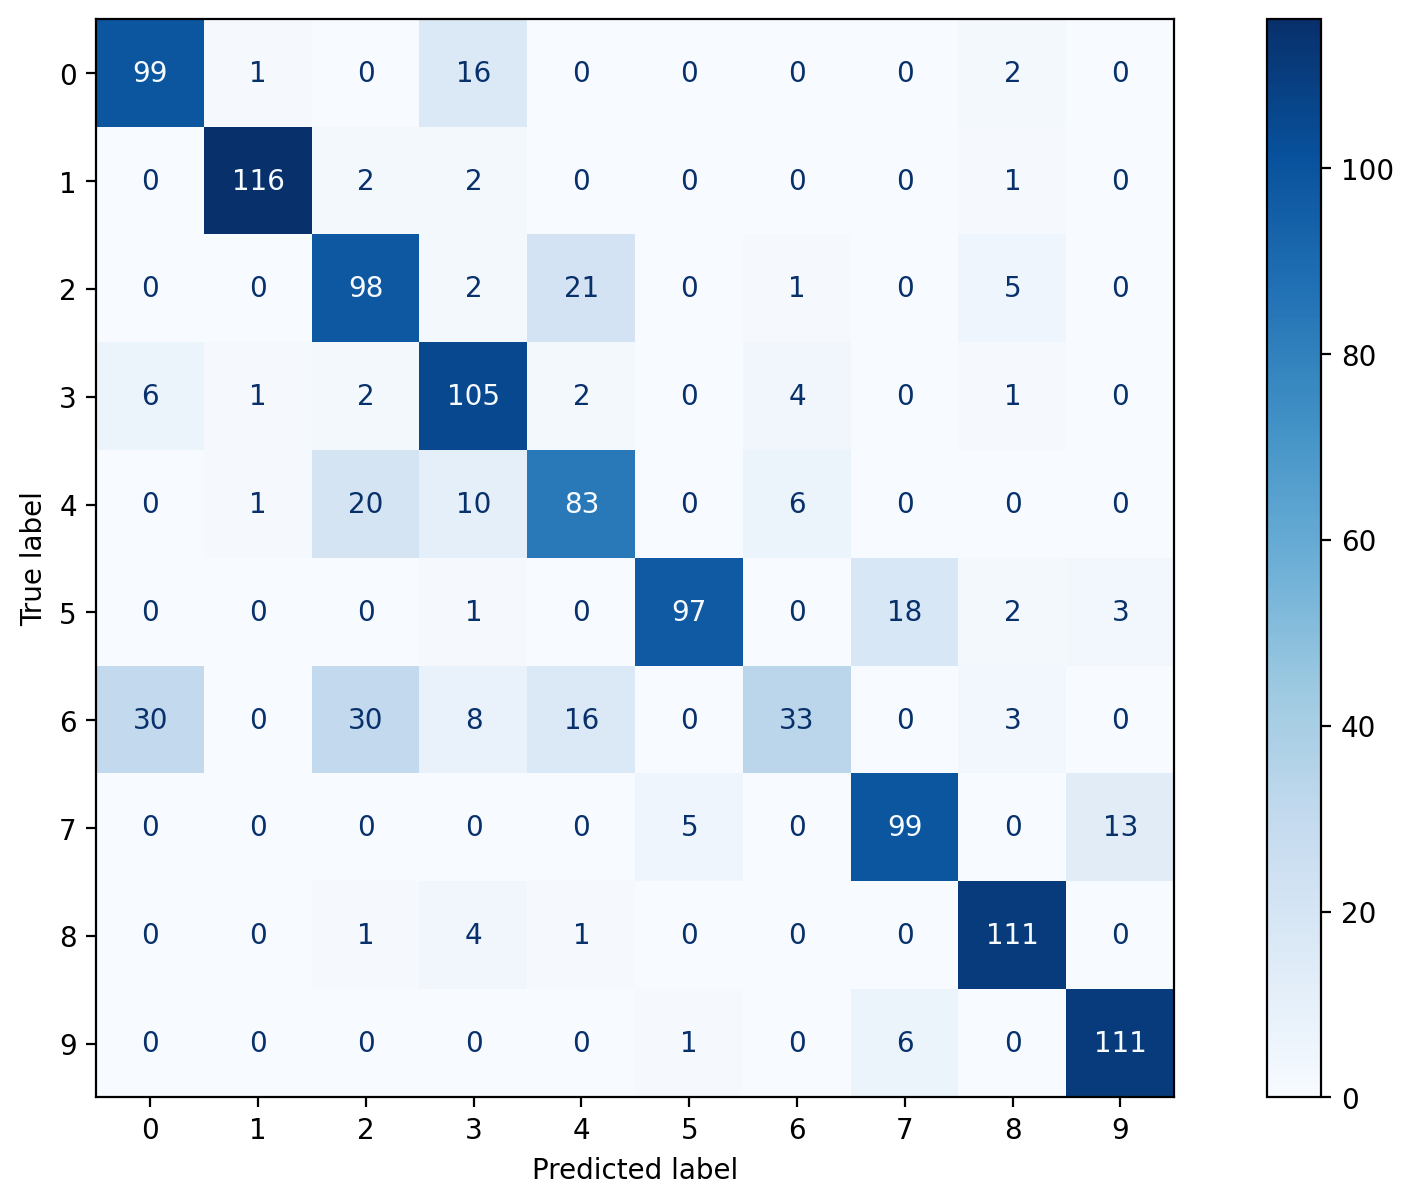

In [29]:
print(metrics.classification_report(y_valid, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_valid, y_pred, cmap = 'Blues')